# Analysing raw EDA signals from EmbracePlus device

Adapted from [here](https://rpanderson-neurokit2.readthedocs.io/en/latest/examples/eda.html#Extract-the-cleaned-EDA-signal) to work for our EmbracePlus devices.

In [4]:
#First let's import
import heartpy as hp
import neurokit2 as nk
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images

EmbracePlus devices exports raw data as a .avro data file. First, we need to convert the .avro to .csv files before analysing the raw EDA signals. Use the avroToCSV.py helper file for this. <br>
Note: EDA signals are recorded at 4Hz and timer units is given in UNIX timestamps (in microseconds).

In [18]:
# Load sample file using heartpy helper functions to save time
eda_data = hp.get_data('processed_eda.csv', column_name = 'eda')
timer_data = hp.get_data('processed_eda.csv', column_name='unix_timestamp')

# Datetime requires timestamp in seconds
# Convert unix_timestamp from microseconds to seconds
#timer_data = timer_data/1000000

# Convert each timestamp to a formatted datetime object
datetime_data = [datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S.%f') for ts in timer_data]

# Calculate sample rate
sample_rate = int(hp.get_samplerate_datetime(datetime_data, timeformat='%Y-%m-%d %H:%M:%S.%f'))
print('sample rate is: %f Hz' %sample_rate)

sample rate is: 64.000000 Hz


### Plot the entire PPG signal recording

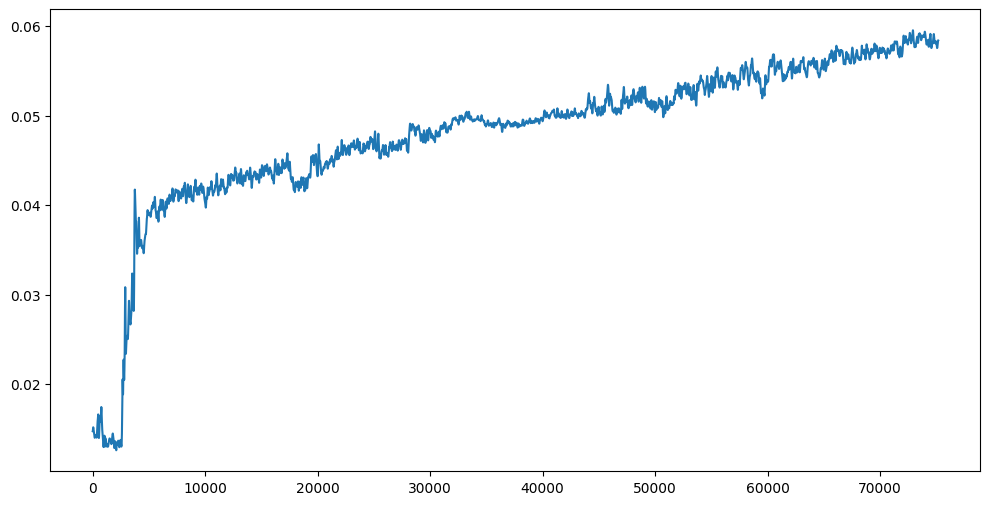

In [19]:
#plot data
plt.figure(figsize=(12,6))
plt.plot(eda_data)
plt.show() 


Notice there is massive spikes at the beginning. These indicate that this portion of the recording may not have much of a EDA signal going on, but rather an interference or the user not actually wearing the device. <br> 
### Let's look at where we think we know there is a EDA signal going on.

#### 5 to 10 minutes in the recording:

In [ ]:
#plot first between 5 and 10 minute and zoomed in
plt.figure(figsize=(12,6))
plt.plot(eda_data[(5 * 60) * sample_rate:(10 * 60) * sample_rate])
plt.ylim(0, 0.10)
plt.show()

#### 5 to 6 minutes in the recording:

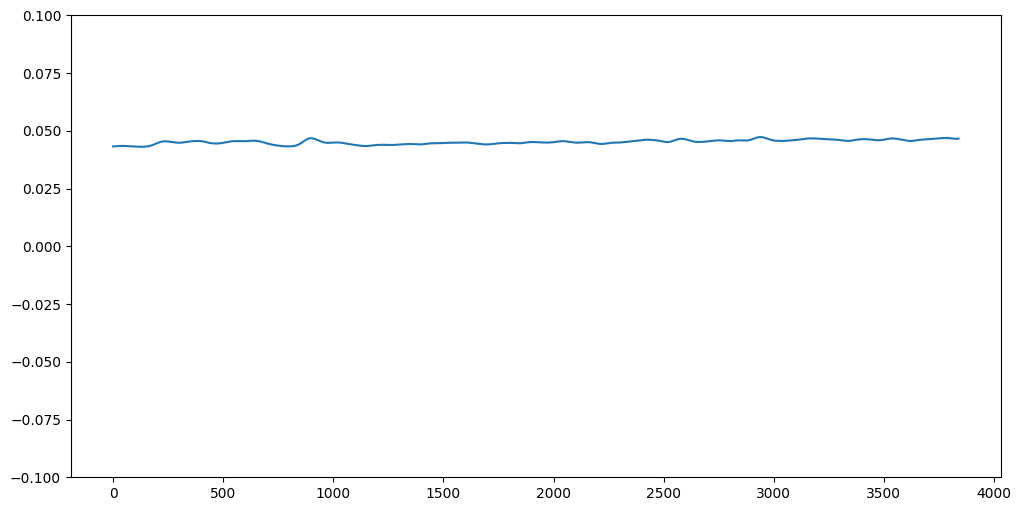

In [33]:
#plot first between 5 and 6 minute and zoomed in
plt.figure(figsize=(12,6))
plt.plot(eda_data[(5 * 60) * sample_rate:(6 * 60) * sample_rate])
plt.ylim(-0.10, 0.10)
plt.show()

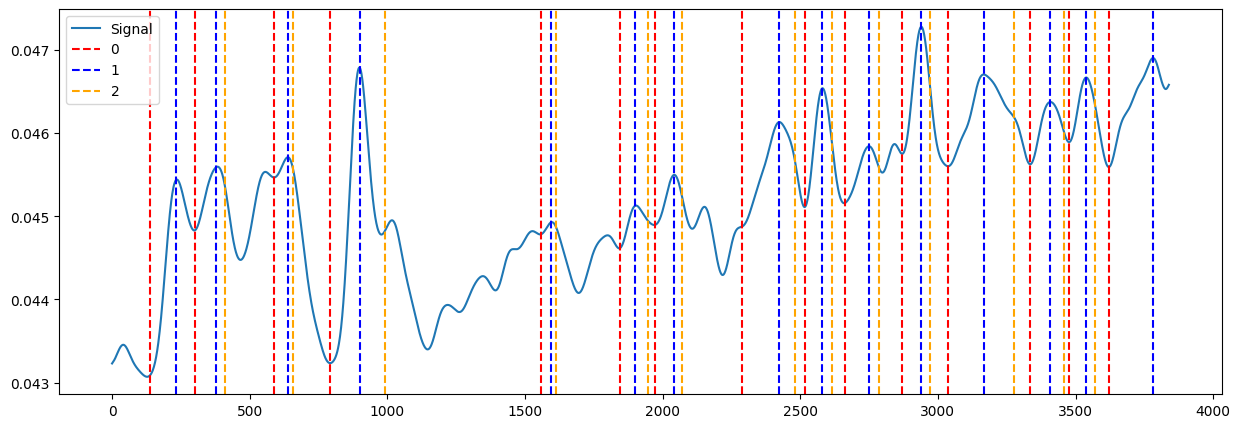

In [29]:
# Process the raw EDA signal
signals, info = nk.eda_process(eda_data[(5 * 60) * sample_rate:(6 * 60) * sample_rate], sampling_rate=sample_rate)
# Extract clean EDA and SCR features
#  Low-pass filter with a 3 Hz cutoff frequency and a 4th order Butterworth filter. 
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]
# Visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

-0.01629887249734209


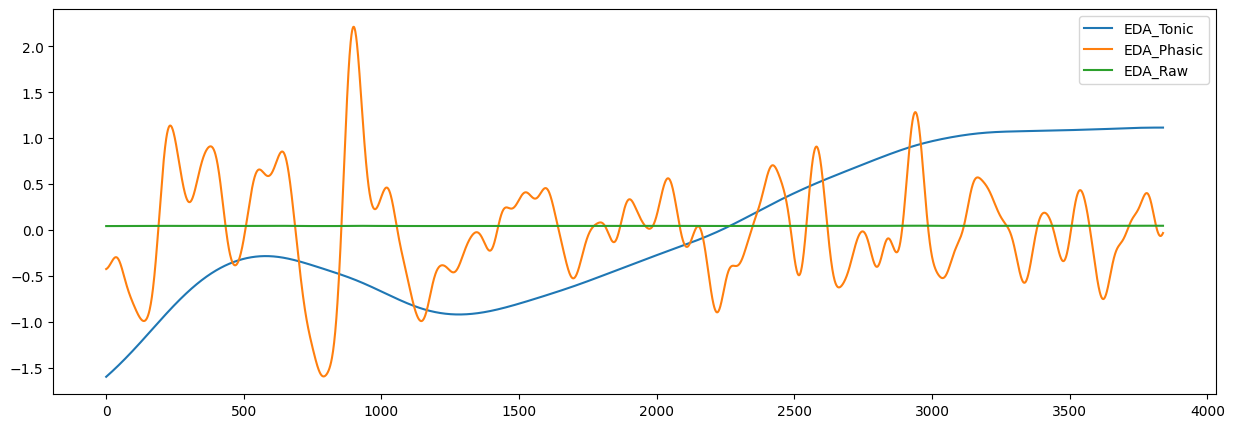

In [40]:
# Filter phasic and tonic components
data = nk.eda_phasic(nk.standardize(eda_data[(5 * 60) * sample_rate:(6 * 60) * sample_rate]), sampling_rate=sample_rate)
data["EDA_Raw"] = eda_data[(5 * 60) * sample_rate:(6 * 60) * sample_rate]  # Add raw signal
data.plot()
print(data)

In [31]:
#nk.eda_analyze(signals, sampling_rate=250) 
nk.eda_intervalrelated(signals, sampling_rate=sample_rate)


,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,15.0,0.001049,0.000749,NaN,NaN,0.415557


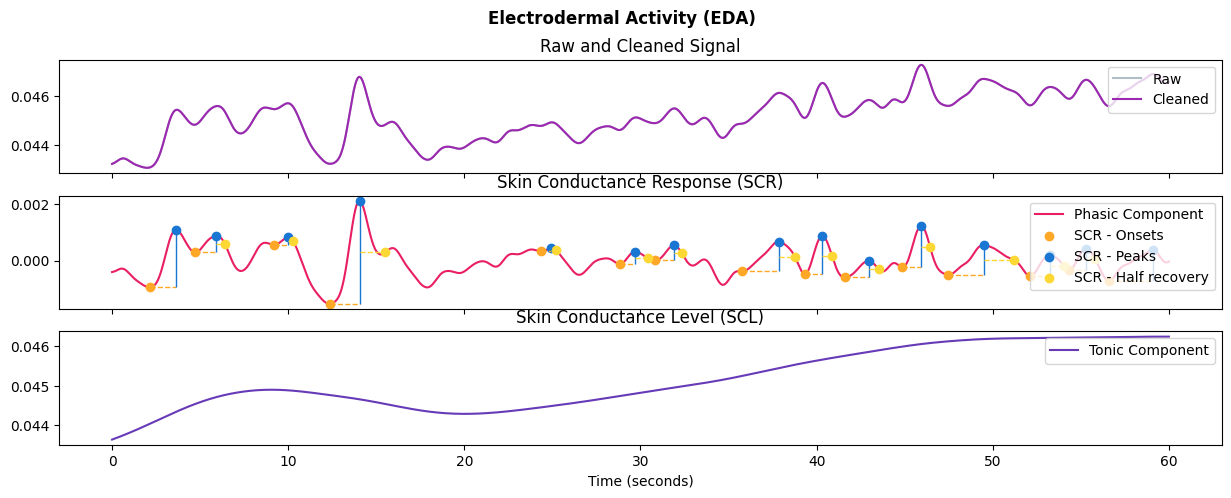

In [32]:
# Plot EDA signal
nk.eda_plot(signals, info)